get and load the data

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permission

!kaggle datasets download -d imbikramsaha/hindi-mnist

!unzip hindi-mnist.zip

Streaming output truncated to the last 5000 lines.
  inflating: Hindi-MNIST/train/7/10299.png  
  inflating: Hindi-MNIST/train/7/10300.png  
  inflating: Hindi-MNIST/train/7/10301.png  
  inflating: Hindi-MNIST/train/7/10302.png  
  inflating: Hindi-MNIST/train/7/10303.png  
  inflating: Hindi-MNIST/train/7/10304.png  
  inflating: Hindi-MNIST/train/7/10306.png  
  inflating: Hindi-MNIST/train/7/10307.png  
  inflating: Hindi-MNIST/train/7/104017.png  
  inflating: Hindi-MNIST/train/7/104018.png  
  inflating: Hindi-MNIST/train/7/104019.png  
  inflating: Hindi-MNIST/train/7/104021.png  
  inflating: Hindi-MNIST/train/7/104023.png  
  inflating: Hindi-MNIST/train/7/104024.png  
  inflating: Hindi-MNIST/train/7/104025.png  
  inflating: Hindi-MNIST/train/7/104026.png  
  inflating: Hindi-MNIST/train/7/104027.png  
  inflating: Hindi-MNIST/train/7/104028.png  
  inflating: Hindi-MNIST/train/7/104029.png  
  inflating: Hindi-MNIST/train/7/104030.png  
  inflating: Hindi-MNIST/train/7/1040

In [2]:
import numpy as np
import pandas as pd

In [3]:
import tensorflow
print("GPU Available:", tensorflow.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

train_dir='/content/Hindi-MNIST/train'
test_dir='/content/Hindi-MNIST/test'

def load_data_from_directory(directory):
  X=[]
  y=[]
  for label in range(10):
    label_dir = os.path.join(directory,str(label))
    for file_name in os.listdir(label_dir):
      if file_name.endswith('.png'):
        file_path=os.path.join(label_dir,file_name)
        #load
        image=Image.open(file_path).convert('L')
        image=image.resize((32,32))
        image=np.array(image)
        image=image.flatten()
        X.append(image)
        y.append(label)
  return np.array(X),np.array(y)

X_train,y_train = load_data_from_directory(train_dir)
X_test,y_test = load_data_from_directory(test_dir)

In [5]:
X_train.shape

(17000, 1024)

In [6]:
#normalize
X_train=X_train/255.0
X_test=X_test/255.0

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [8]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

build and train the model

In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model=keras.Sequential()
model.add(Dense(128,activation='relu',input_shape=(1024,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,106 (547.29 KB)

 Trainable params: 140,106 (547.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
history=model.fit(X_train,y_train,epochs=25,validation_data=(X_val,y_val),callbacks=[callback])

Epoch 1/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8255 - loss: 0.5853 - val_accuracy: 0.9665 - val_loss: 0.1098
Epoch 2/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0906 - val_accuracy: 0.9644 - val_loss: 0.1053
Epoch 3/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0503 - val_accuracy: 0.9776 - val_loss: 0.0739
Epoch 4/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9901 - loss: 0.0339 - val_accuracy: 0.9812 - val_loss: 0.0553
Epoch 5/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0210 - val_accuracy: 0.9550 - val_loss: 0.1345
Epoch 6/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9841 - val_loss: 0.0518
Epoch 7/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0067 - val_accuracy: 0.9821 - val_loss: 0.0557
Epoch 8/25
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.

In [14]:
from sklearn.metrics import accuracy_score
y_prob=model.predict(X_test)
y_pred=np.argmax(y_prob,axis=1)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy: 0.9673333333333334


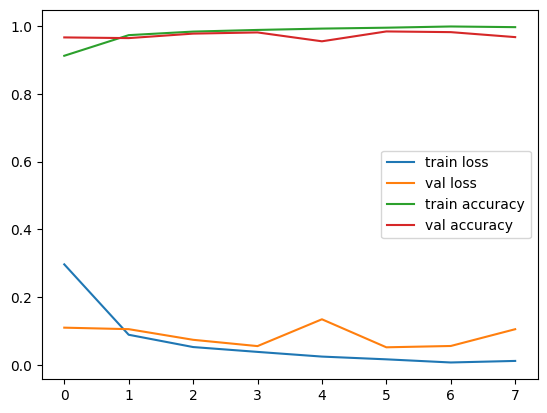

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


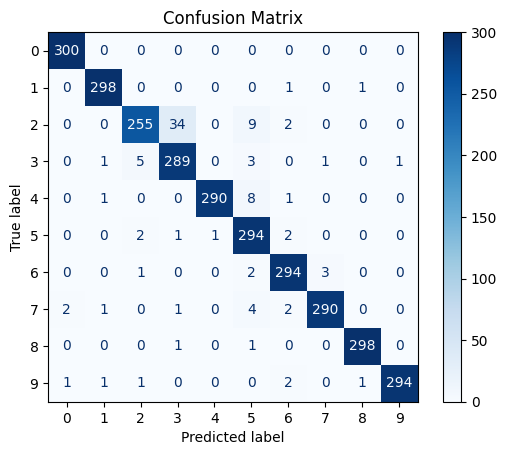

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [19]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Hindi MNIST/ANN_epoch_8.keras')

Requirements:-
numpy
pandas
tensorflow
PIL

Conclusion:- 97% Accuracy reached without any hyperparameter tuning.